<a href="https://colab.research.google.com/github/Ayushi-shukla-tech/Heart-Disease-prediction/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [ ]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226334,Yes,31.93,No,No,No,0.0,10.0,No,Male,50-54,White,No,Yes,Very good,5.0,No,No,No
226335,No,38.62,Yes,No,No,0.0,2.0,Yes,Female,60-64,White,No,Yes,Good,7.0,No,No,No
226336,Yes,22.96,Yes,No,No,0.0,0.0,No,Male,70-74,White,No,No,Fair,6.0,No,No,No
226337,No,27.44,No,No,Yes,0.0,0.0,Yes,Female,70-74,White,No,No,Good,9.0,No,No,No


In [ ]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226339 entries, 0 to 226338
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      226339 non-null  object 
 1   BMI               226339 non-null  float64
 2   Smoking           226339 non-null  object 
 3   AlcoholDrinking   226339 non-null  object 
 4   Stroke            226339 non-null  object 
 5   PhysicalHealth    226339 non-null  float64
 6   MentalHealth      226339 non-null  float64
 7   DiffWalking       226339 non-null  object 
 8   Sex               226339 non-null  object 
 9   AgeCategory       226339 non-null  object 
 10  Race              226339 non-null  object 
 11  Diabetic          226338 non-null  object 
 12  PhysicalActivity  226338 non-null  object 
 13  GenHealth         226338 non-null  object 
 14  SleepTime         226338 non-null  float64
 15  Asthma            226338 non-null  object 
 16  KidneyDisease     22

In [ ]:
df.shape

(226339, 18)

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,226339.000000,226339.000000,226339.000000,226338.000000
mean,28.285000,3.320550,3.863342,7.106310
std,6.331654,7.890979,7.908137,1.438434
min,12.020000,0.000000,0.000000,1.000000
25%,24.000000,0.000000,0.000000,6.000000
50%,27.320000,0.000000,0.000000,7.000000
75%,31.350000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'PhysicalHealth'}>],
       [<Axes: title={'center': 'MentalHealth'}>,
        <Axes: title={'center': 'SleepTime'}>]], dtype=object)

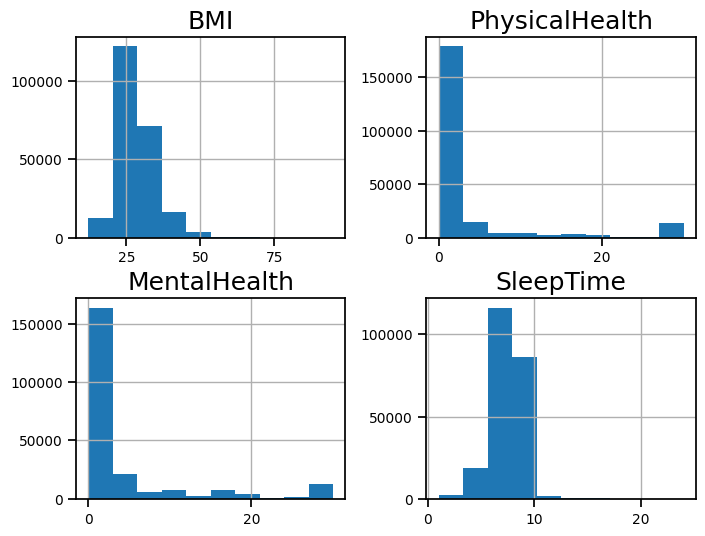

In [ ]:
df.hist(xlabelsize=10, ylabelsize=10)

In [ ]:
df.select_dtypes(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226334,Yes,No,No,No,No,Male,50-54,White,No,Yes,Very good,No,No,No
226335,No,Yes,No,No,Yes,Female,60-64,White,No,Yes,Good,No,No,No
226336,Yes,Yes,No,No,No,Male,70-74,White,No,No,Fair,No,No,No
226337,No,No,No,Yes,Yes,Female,70-74,White,No,No,Good,No,No,No


In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [ ]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226339 entries, 0 to 226338
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   BMI             226339 non-null  float64
 1   PhysicalHealth  226339 non-null  float64
 2   MentalHealth    226339 non-null  float64
 3   SleepTime       226338 non-null  float64
dtypes: float64(4)
memory usage: 6.9 MB


In [ ]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226339 entries, 0 to 226338
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HeartDisease      226339 non-null  object
 1   Smoking           226339 non-null  object
 2   AlcoholDrinking   226339 non-null  object
 3   Stroke            226339 non-null  object
 4   DiffWalking       226339 non-null  object
 5   Sex               226339 non-null  object
 6   AgeCategory       226339 non-null  object
 7   Race              226339 non-null  object
 8   Diabetic          226338 non-null  object
 9   PhysicalActivity  226338 non-null  object
 10  GenHealth         226338 non-null  object
 11  Asthma            226338 non-null  object
 12  KidneyDisease     226338 non-null  object
 13  SkinCancer        226338 non-null  object
dtypes: object(14)
memory usage: 24.2+ MB


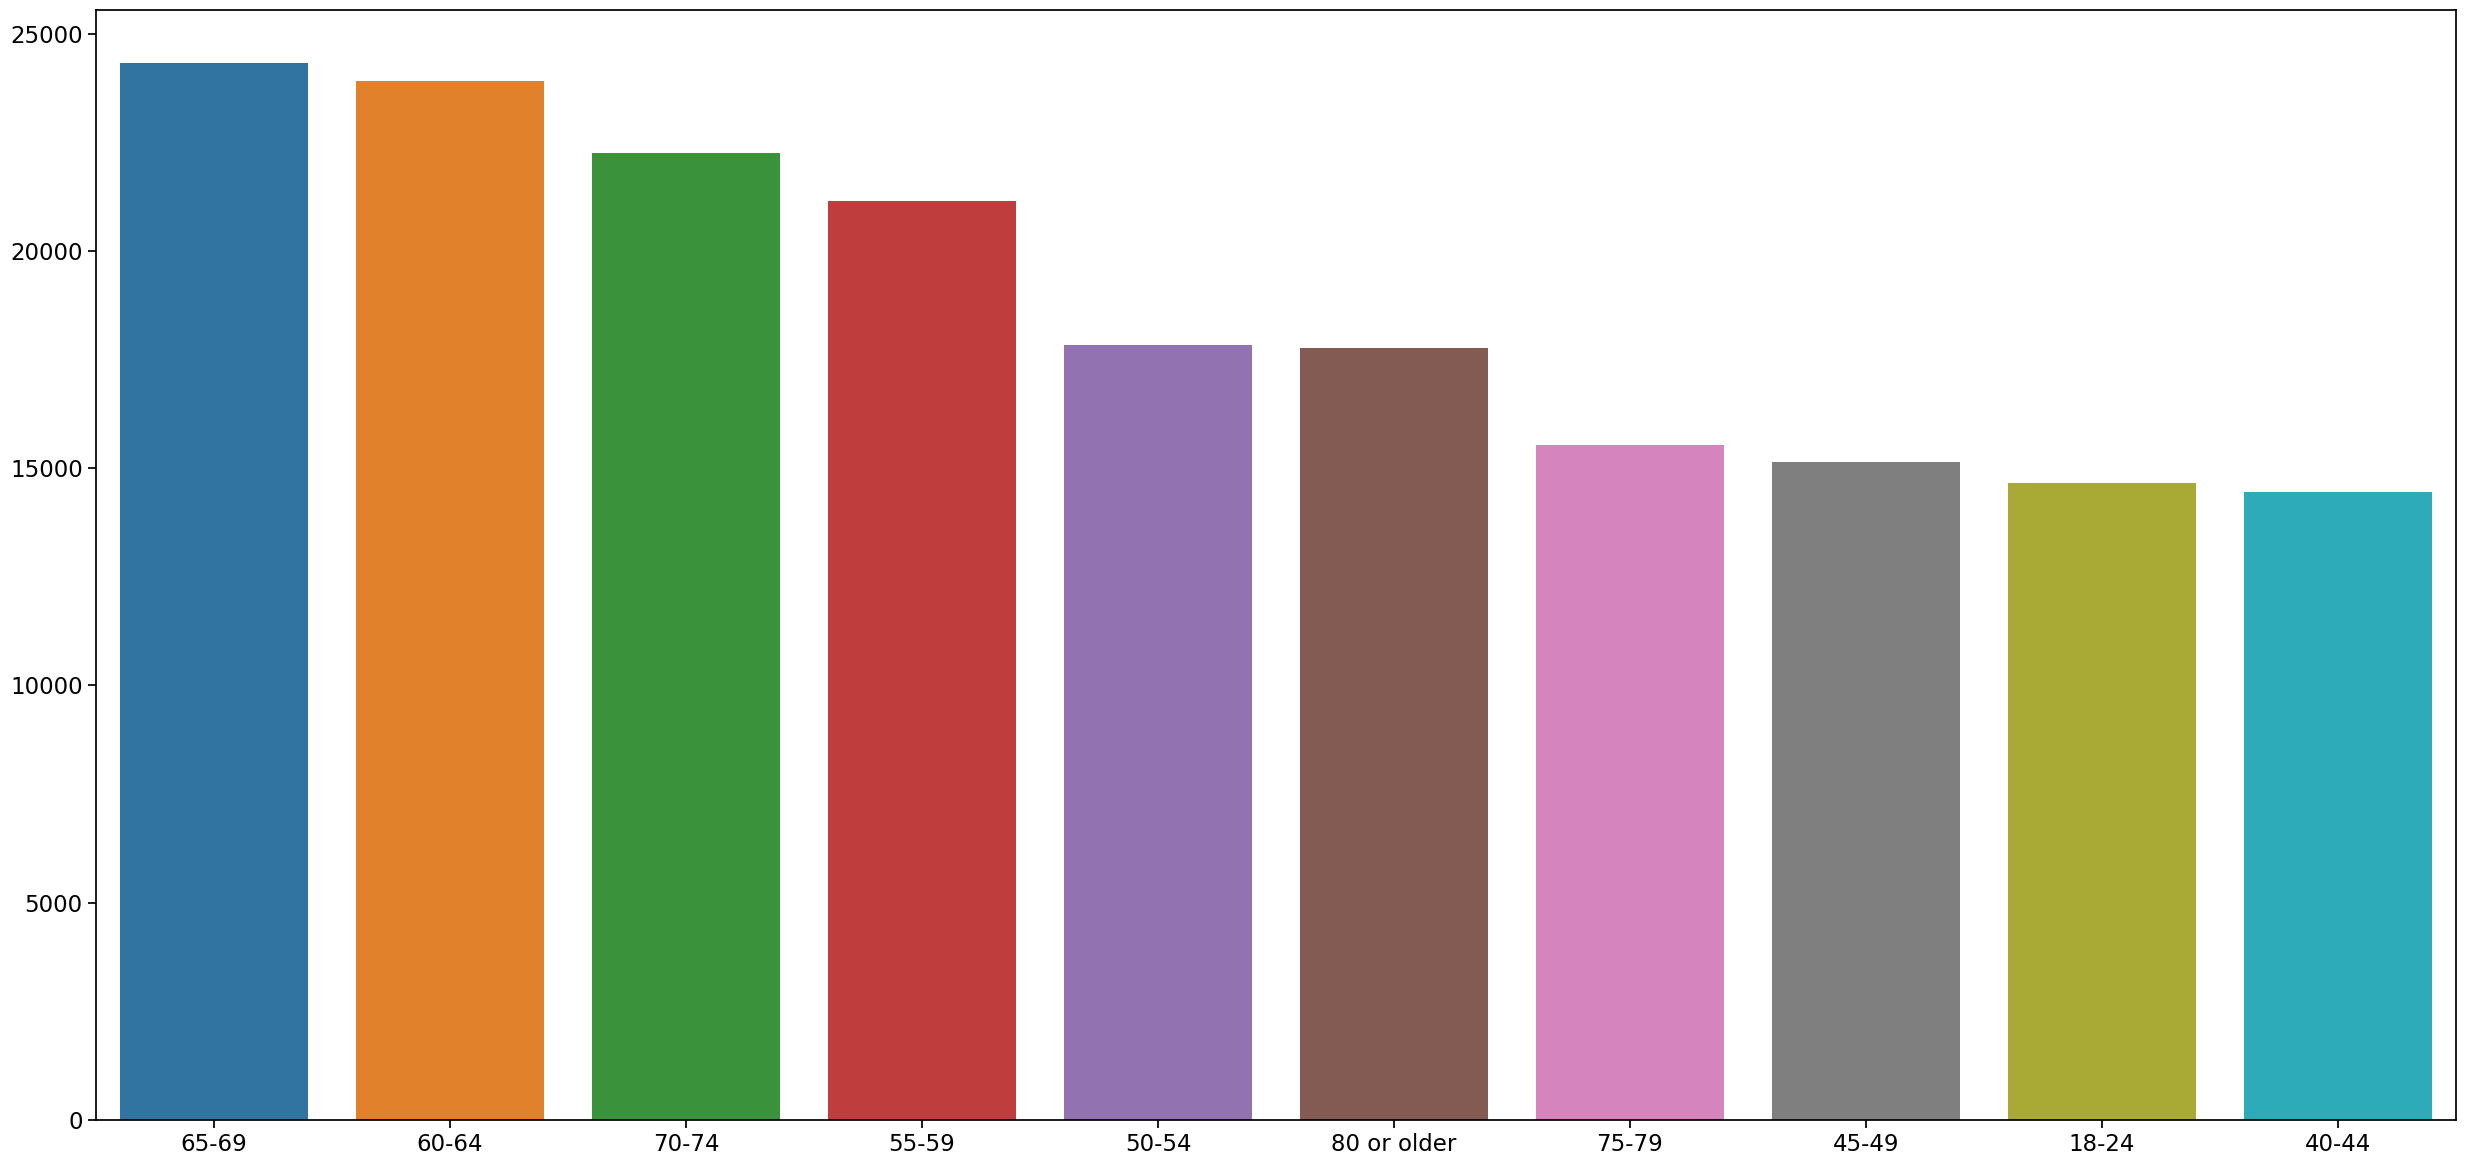

In [ ]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.AgeCategory.value_counts()[:10].index,y=df.AgeCategory.value_counts()[:10].values)
plt.tight_layout()

In [ ]:
DF_sex = df['Sex'].value_counts()
DF_sex

Female    119018
Male      107321
Name: Sex, dtype: int64

In [ ]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [ ]:
final_df = pd.concat([df_nums,df_objs],axis=1)
final_df

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226334,31.93,0.0,10.0,5.0,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
226335,38.62,0.0,2.0,7.0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
226336,22.96,0.0,0.0,6.0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
226337,27.44,0.0,0.0,9.0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
final_df.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'HeartDisease_Yes', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes',
       'DiffWalking_Yes', 'Sex_Male', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_Other', 'Race_Whi', 'Race_White',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_Yes',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'Asthma_Yes', 'KidneyDisease_Yes',
       'SkinCancer_Yes'],
      dtype='object')

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226339 entries, 0 to 226338
Data columns (total 39 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   BMI                               226339 non-null  float64
 1   PhysicalHealth                    226339 non-null  float64
 2   MentalHealth                      226339 non-null  float64
 3   SleepTime                         226338 non-null  float64
 4   HeartDisease_Yes                  226339 non-null  uint8  
 5   Smoking_Yes                       226339 non-null  uint8  
 6   AlcoholDrinking_Yes               226339 non-null  uint8  
 7   Stroke_Yes                        226339 non-null  uint8  
 8   DiffWalking_Yes                   226339 non-null  uint8  
 9   Sex_Male                          226339 non-null  uint8  
 10  AgeCategory_25-29                 226339 non-null  uint8  
 11  AgeCategory_30-34                 226339 non-null  u

Text(0.5, 1.0, 'Count of each sex')

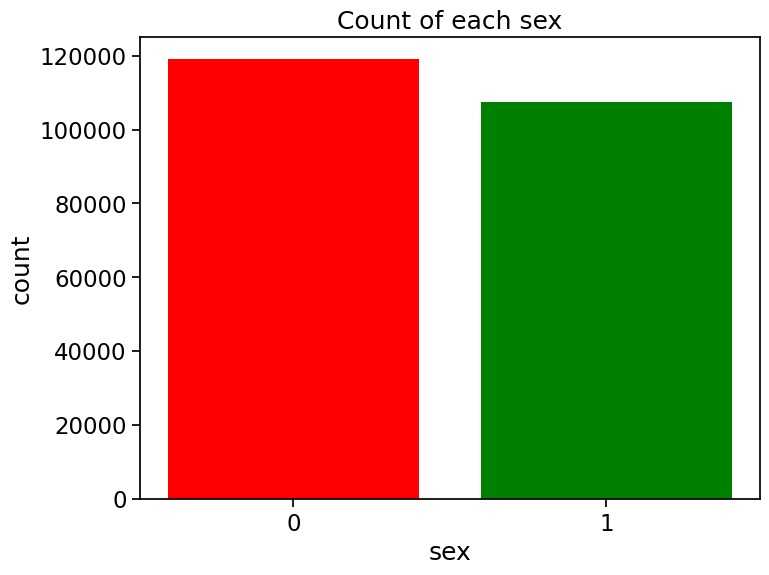

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
rcParams['figure.figsize'] = 8,6
plt.bar(final_df['Sex_Male'].unique(), final_df['Sex_Male'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('sex')
plt.ylabel('count')
plt.title('Count of each sex')

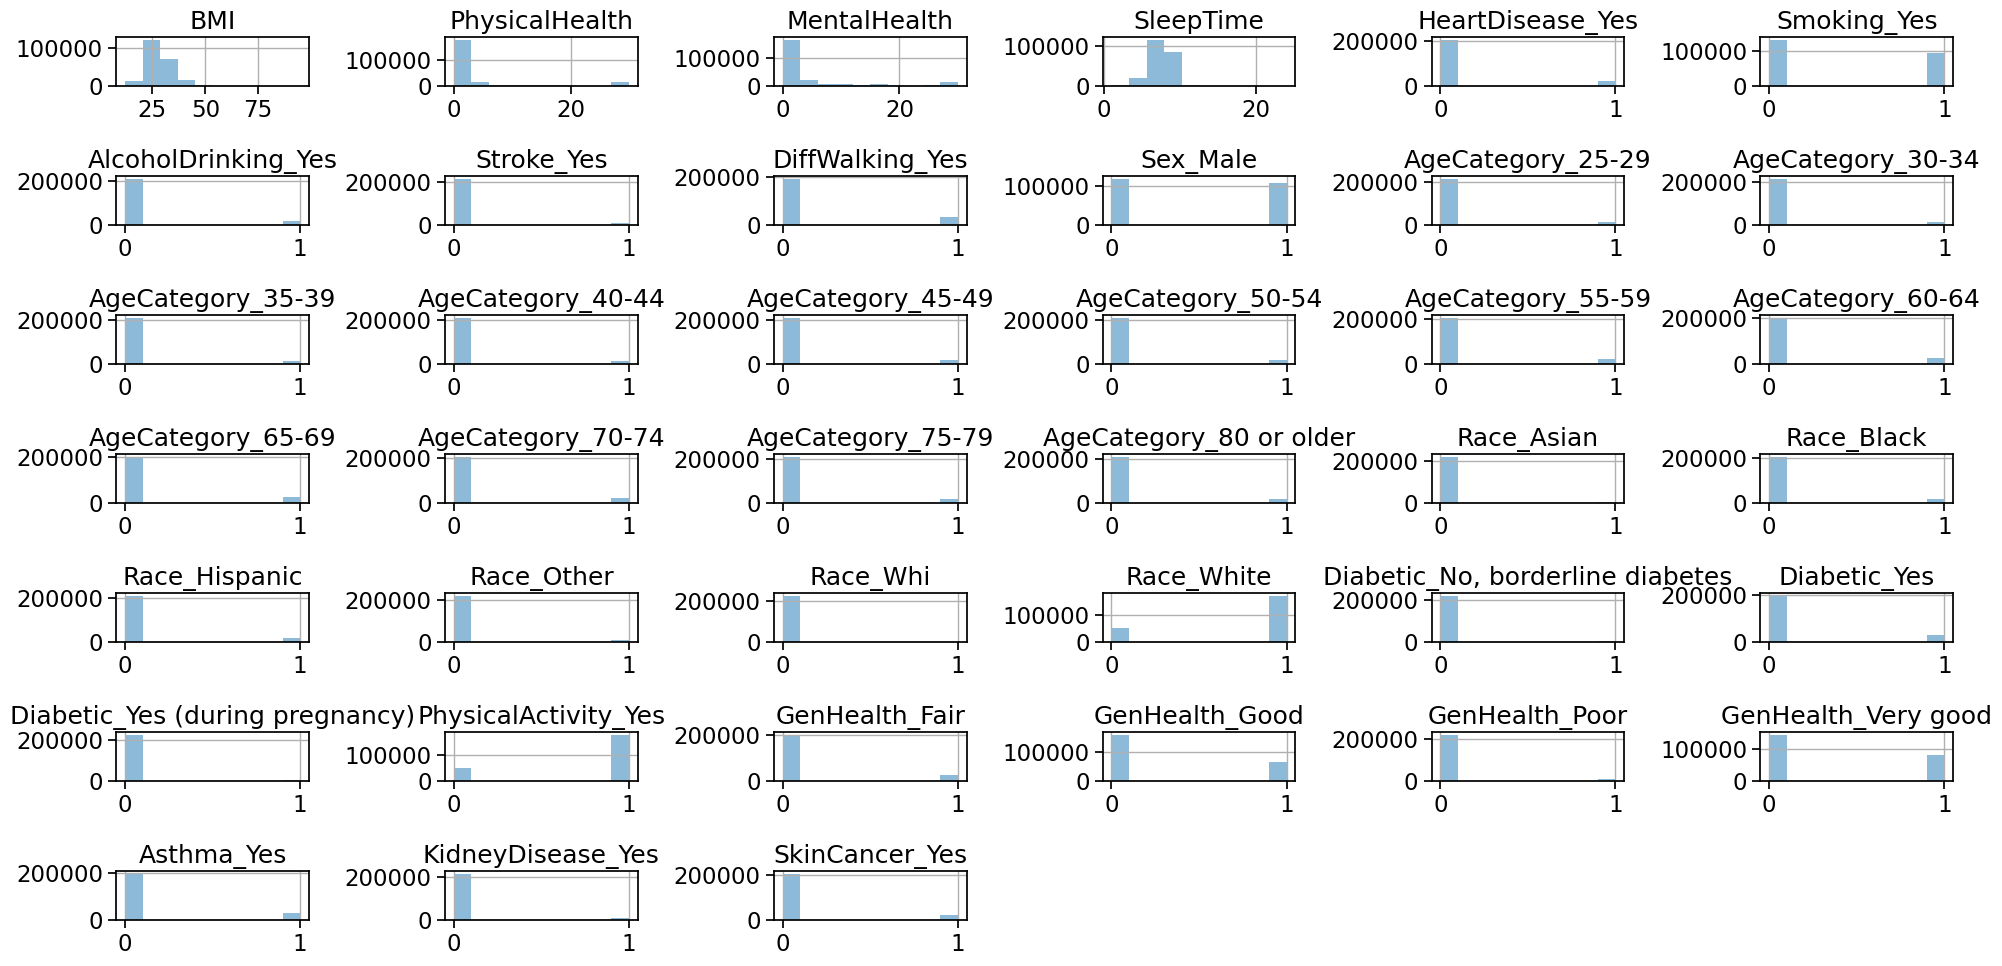

In [ ]:
final_df.hist(alpha=0.5, figsize=(20,10))
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

[Text(0, 0, '1.0'),
 Text(1, 0, '2.0'),
 Text(2, 0, '3.0'),
 Text(3, 0, '4.0'),
 Text(4, 0, '5.0'),
 Text(5, 0, '6.0'),
 Text(6, 0, '7.0'),
 Text(7, 0, '8.0'),
 Text(8, 0, '9.0'),
 Text(9, 0, '10.0'),
 Text(10, 0, '11.0'),
 Text(11, 0, '12.0'),
 Text(12, 0, '13.0'),
 Text(13, 0, '14.0'),
 Text(14, 0, '15.0'),
 Text(15, 0, '16.0'),
 Text(16, 0, '17.0'),
 Text(17, 0, '18.0'),
 Text(18, 0, '19.0'),
 Text(19, 0, '20.0'),
 Text(20, 0, '21.0'),
 Text(21, 0, '22.0'),
 Text(22, 0, '24.0')]

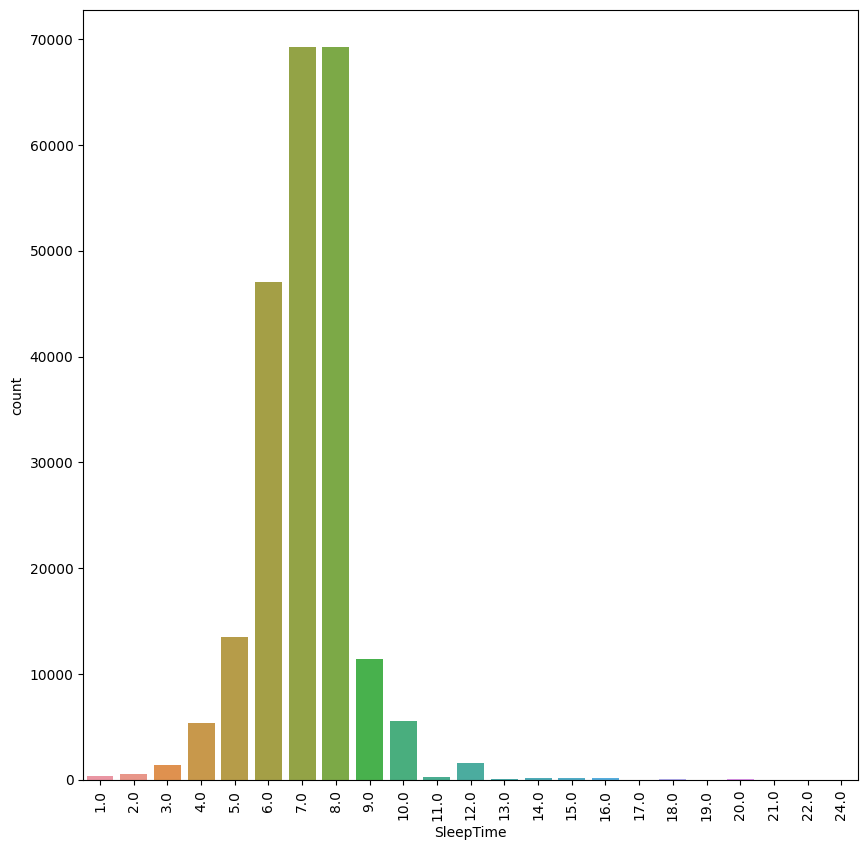

In [ ]:
plt.figure(figsize=(10,10))
chart = sns.countplot(df=final_df,x= 'SleepTime')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

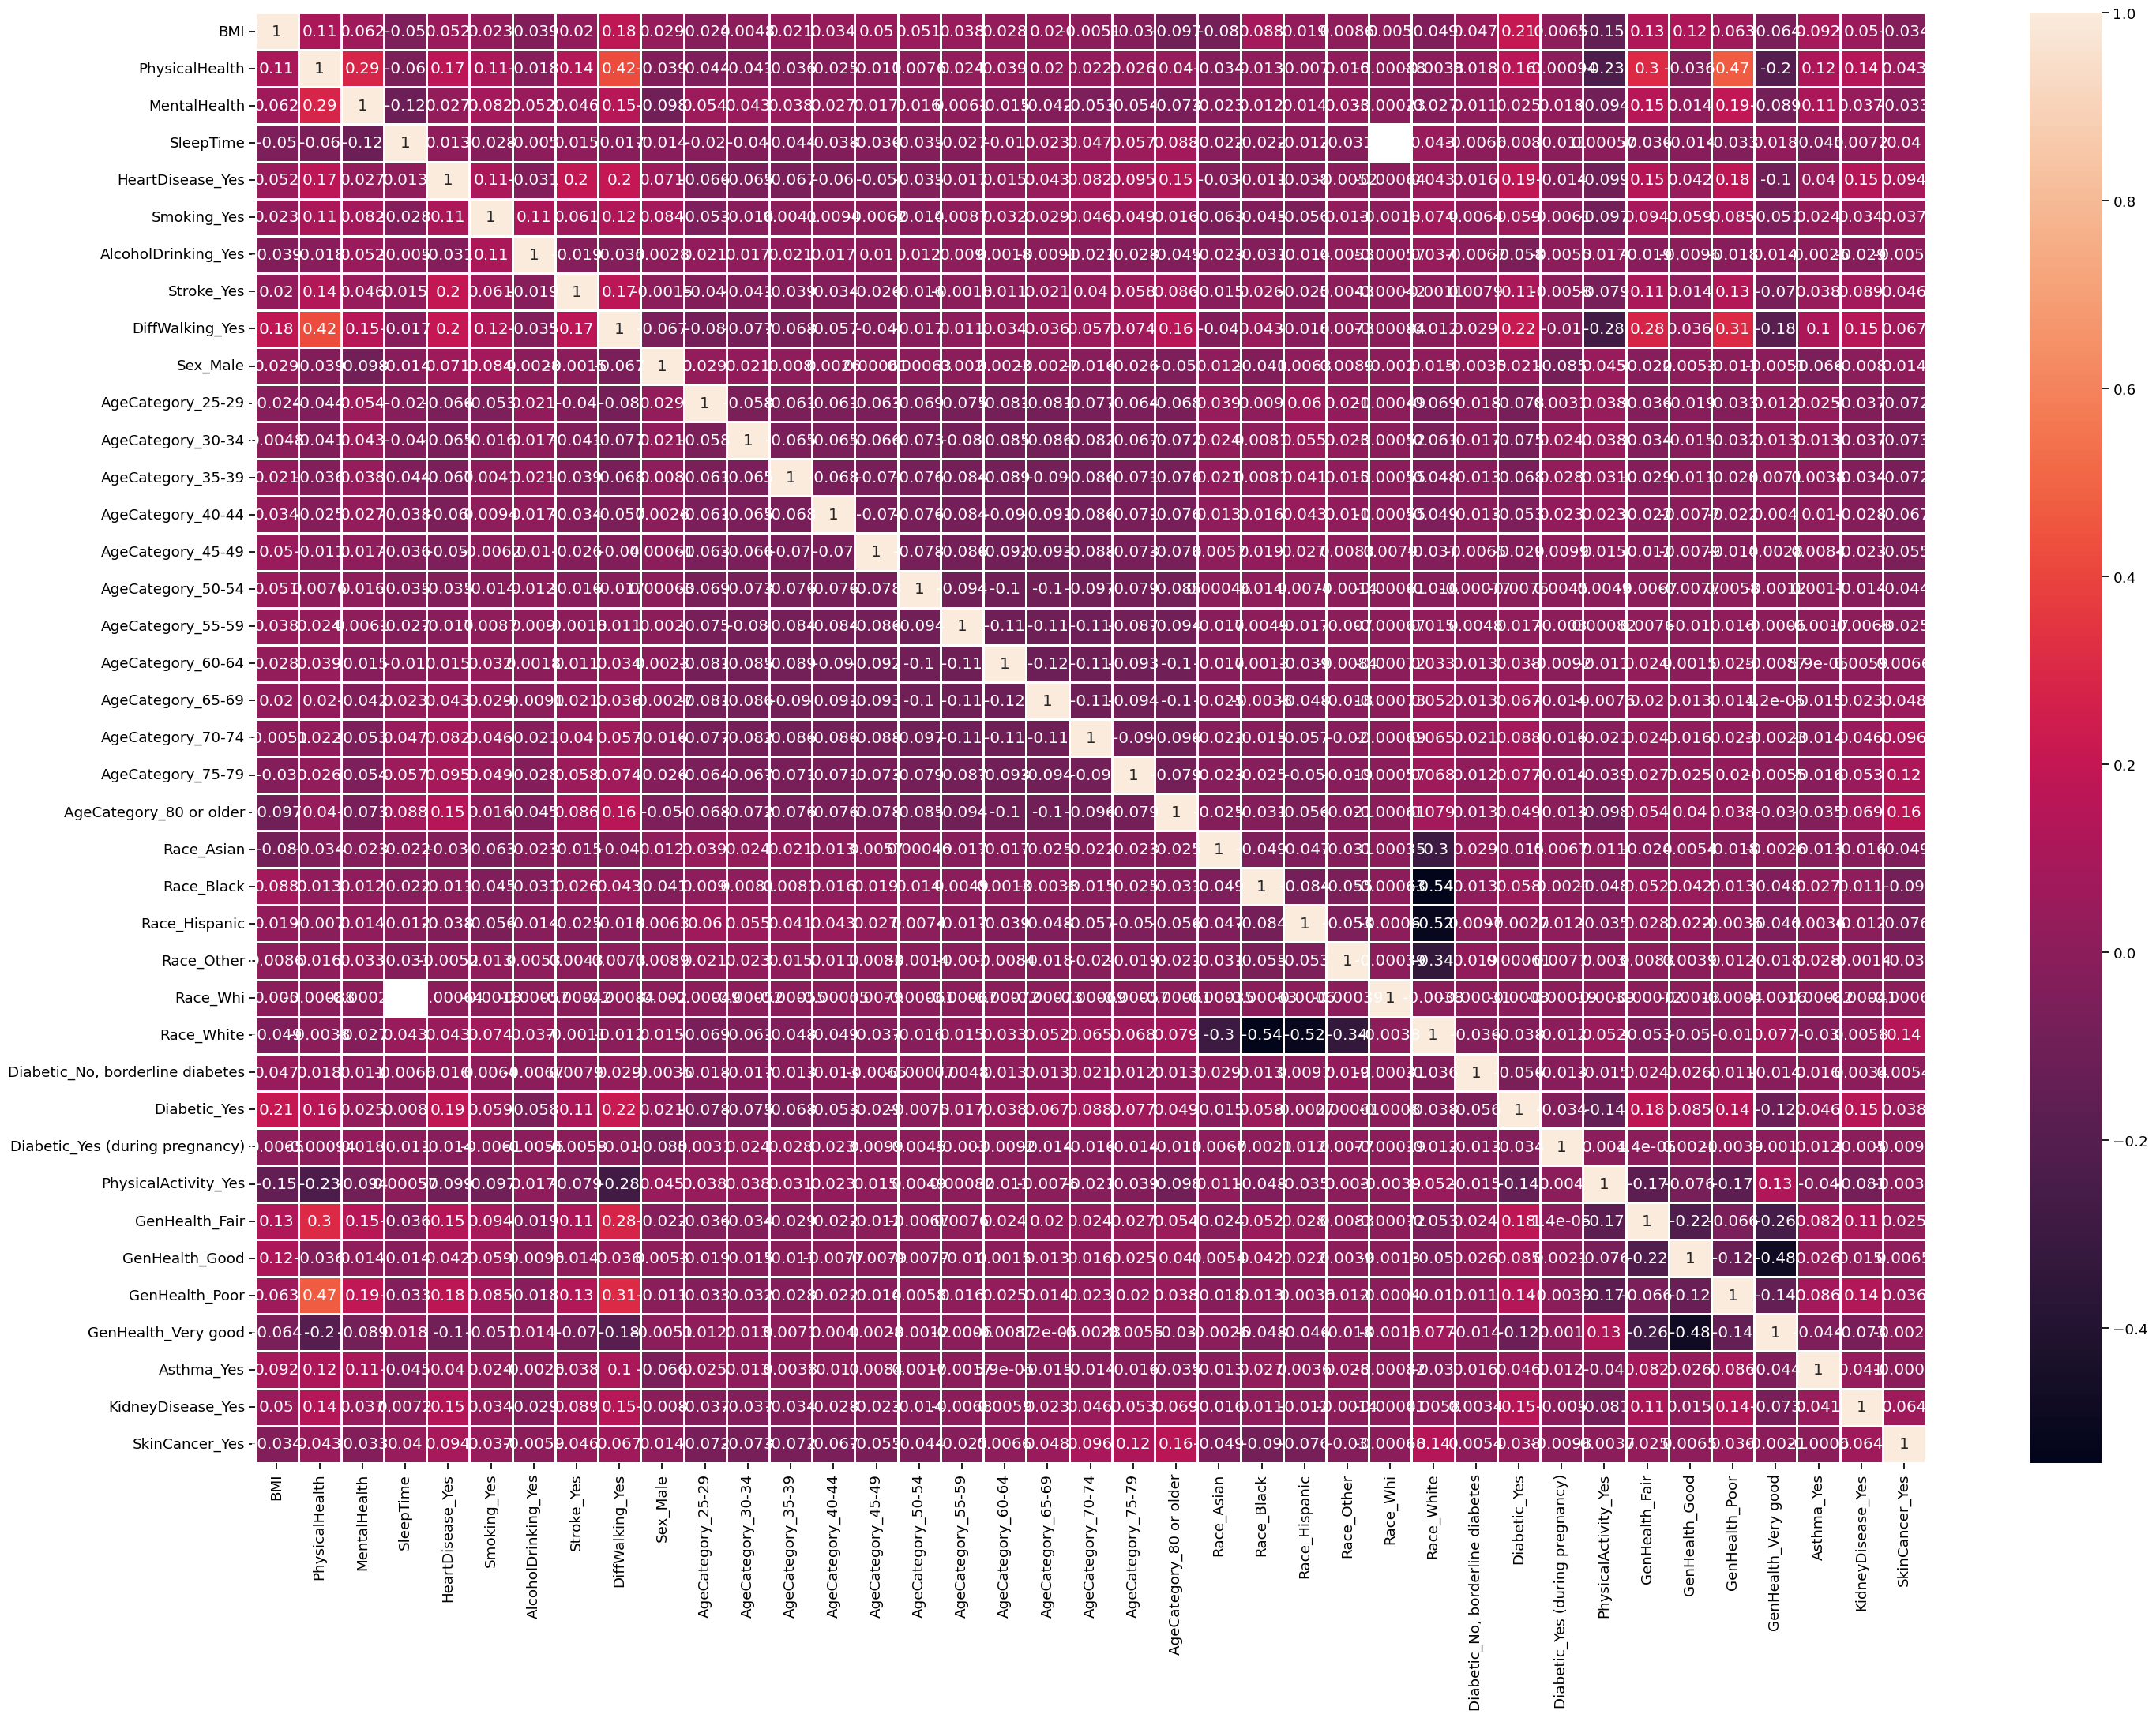

In [ ]:
plt.figure(figsize=(30,22))
sns.set_context('notebook',font_scale = 1.2)
sns.heatmap(final_df.corr(),annot=True,linewidth =1)
plt.tight_layout()

In [ ]:
final_df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
BMI,1.000000,0.110057,0.061948,-0.049874,0.051982,0.022940,-0.038775,0.020303,0.182361,0.029391,...,0.205239,0.006450,-0.149318,0.127462,0.116879,0.062809,-0.064048,0.092079,0.050319,-0.034028
PhysicalHealth,0.110057,1.000000,0.285259,-0.059599,0.168078,0.113522,-0.017523,0.136170,0.424430,-0.039005,...,0.157734,-0.000939,-0.231607,0.302682,-0.036121,0.471089,-0.195274,0.116531,0.141272,0.042706
MentalHealth,0.061948,0.285259,1.000000,-0.117792,0.027068,0.081859,0.051766,0.046260,0.149948,-0.098405,...,0.024978,0.018236,-0.093827,0.150199,0.014295,0.186364,-0.089123,0.110891,0.037128,-0.033169
SleepTime,-0.049874,-0.059599,-0.117792,1.000000,0.012912,-0.027573,-0.004989,0.014952,-0.017293,-0.014113,...,0.007982,-0.010655,0.000569,-0.036339,-0.013605,-0.032882,0.017509,-0.045154,0.007153,0.040175
HeartDisease_Yes,0.051982,0.168078,0.027068,0.012912,1.000000,0.108318,-0.030616,0.196620,0.201228,0.071225,...,0.185501,-0.013798,-0.098991,0.146553,0.041680,0.175303,-0.100656,0.040370,0.145355,0.094392
Smoking_Yes,0.022940,0.113522,0.081859,-0.027573,0.108318,1.000000,0.109214,0.061205,0.122037,0.083742,...,0.058808,-0.006123,-0.097434,0.094183,0.059394,0.084843,-0.051034,0.024351,0.034123,0.036594
AlcoholDrinking_Yes,-0.038775,-0.017523,0.051766,-0.004989,-0.030616,0.109214,1.000000,-0.019204,-0.035169,0.002815,...,-0.058337,-0.005467,0.016700,-0.018695,-0.009627,-0.017906,0.014093,-0.002570,-0.028614,-0.005924
Stroke_Yes,0.020303,0.136170,0.046260,0.014952,0.196620,0.061205,-0.019204,1.000000,0.172157,-0.001477,...,0.108283,-0.005757,-0.078581,0.107178,0.014213,0.133655,-0.070004,0.038018,0.089168,0.045754
DiffWalking_Yes,0.182361,0.424430,0.149948,-0.017293,0.201228,0.122037,-0.035169,0.172157,1.000000,-0.066716,...,0.217059,-0.010119,-0.277884,0.280046,0.036323,0.306056,-0.184019,0.102620,0.150313,0.066635
Sex_Male,0.029391,-0.039005,-0.098405,-0.014113,0.071225,0.083742,0.002815,-0.001477,-0.066716,1.000000,...,0.020635,-0.084759,0.044937,-0.021591,0.005329,-0.010863,-0.005064,-0.066340,-0.008025,0.013582


<Axes: xlabel='BMI', ylabel='MentalHealth'>

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


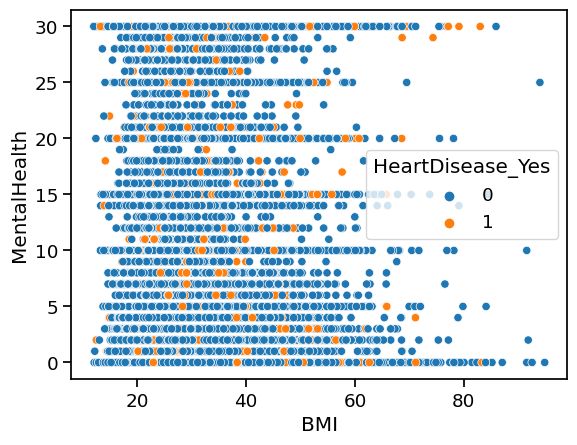

In [ ]:
sns.scatterplot(x='BMI',y='MentalHealth',df=final_df, hue = 'HeartDisease_Yes')

In [ ]:
x = final_df[['BMI', 'Smoking_Yes', 'Diabetic_Yes']]
y = final_df['HeartDisease_Yes']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.8575064062914199

In [ ]:
confusion_matrix(y_test,y_pred)

array([[47903,  3819],
       [ 4244,   619]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     51722
           1       0.14      0.13      0.13      4863

    accuracy                           0.86     56585
   macro avg       0.53      0.53      0.53     56585
weighted avg       0.85      0.86      0.85     56585



In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 19.19305469647433
MSE: 0.14249359370858
RMSE 0.3774832363278931


<ipython-input-92-7de50e1efdac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred), hist_kws=dict(edgecolor="k", linewidth=2))


<Axes: xlabel='HeartDisease_Yes', ylabel='Density'>

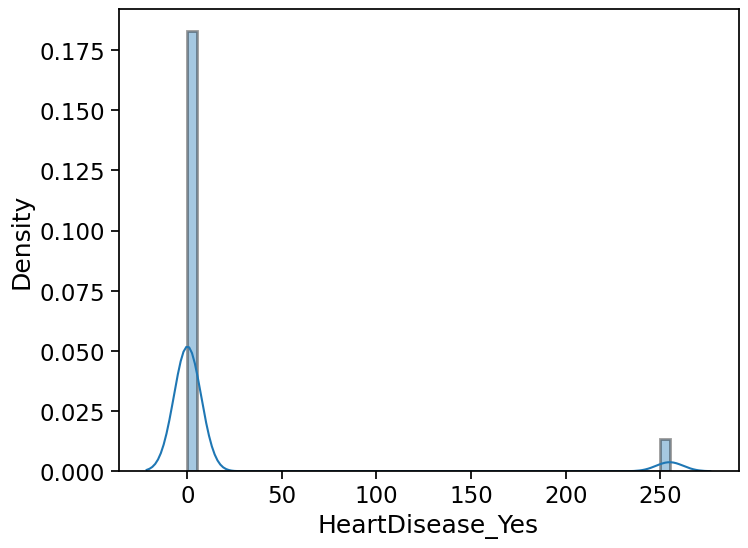

In [ ]:
sns.distplot((y_test-y_pred), hist_kws=dict(edgecolor="k", linewidth=2))

In [ ]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

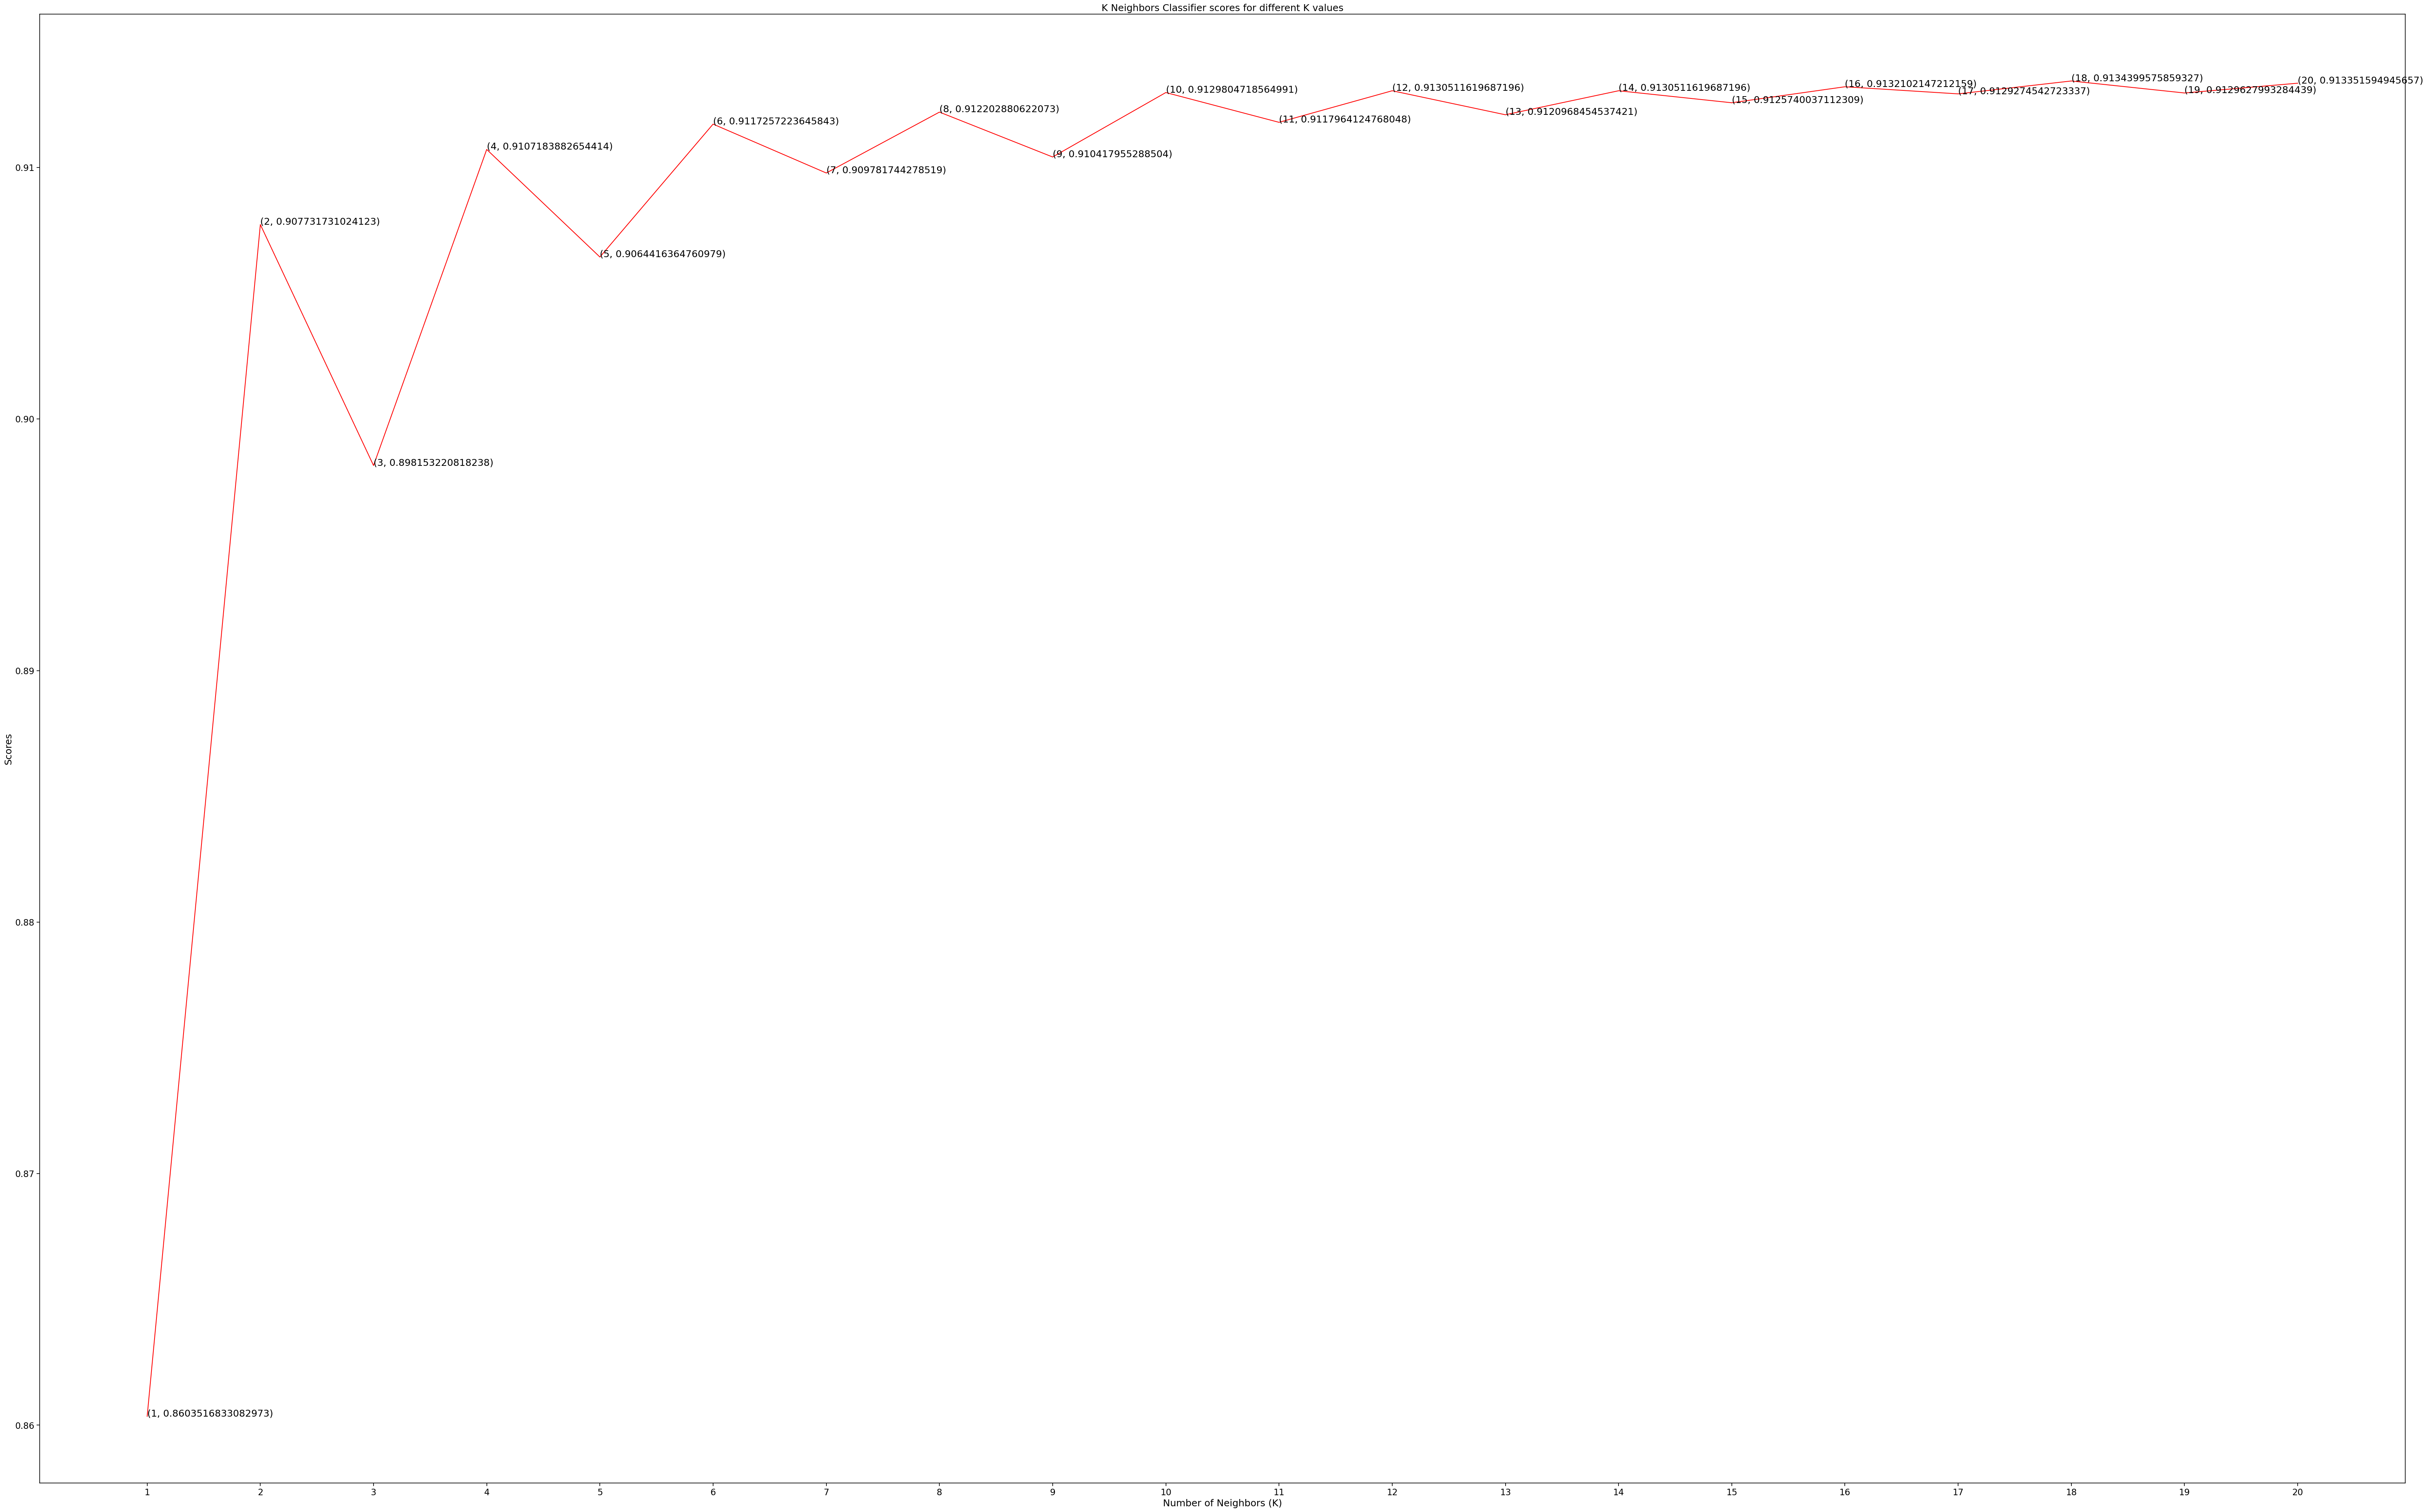

In [ ]:
plt.figure(figsize =(80,50))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')